In [3]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import copy 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import minimize 
from scipy.optimize import minimize_scalar
import QUAD as QUAD
import nashpy as nash
from scipy.stats import beta
from scipy.integrate import quad


# this module contains the data
import hst 

## 4

### 1.

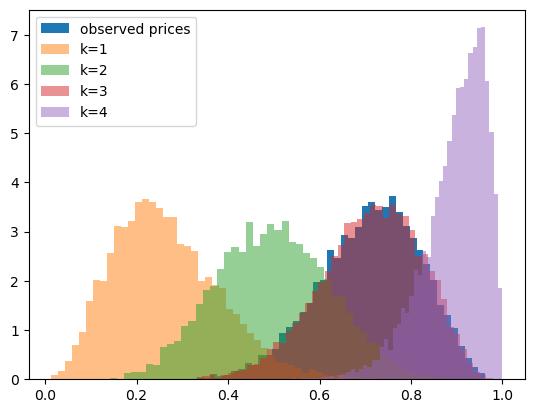

In [12]:
# k = 1
N = 5
T = 10_000

p = pd.read_csv('auction_prices.csv') # pandas dataframe
p = p ['price'].values # convert to numpy
# v = np.random.beta(k, 5-k, (N,T)) # taking random draws
F_cdf = lambda v : beta.cdf(v, k, 5 - k) # the cdf

# plt and don't print arrays
plt.hist(p, bins=50, density=True, label='observed prices')
for k in [1, 2, 3, 4]:
    np.random.seed(1337)
    v = np.random.beta(k, 5-k, (N,T)) # taking random draws
    v.sort(axis=0)
    v = v[-2,:]
    plt.hist(v.flatten(), bins=50, density=True, label=f'k={k}', alpha=0.5)
plt.legend()

### 2.

0.36512242932607
0.5411021823891404
0.7025614091790563


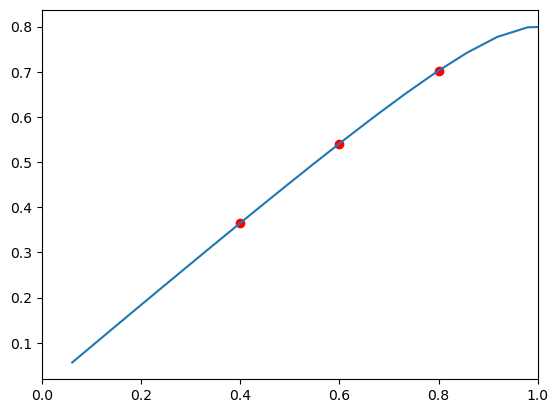

In [17]:
#QUAD
k = 3
N = 5
F_cdf_beta = lambda v : beta.cdf(v, k, 5 - k)

v_grid = np.linspace(0, 3, 50)[1:50] # grid for v

#BNE for en FPSB
def b_star(v): 
    return QUAD.b(v,F_cdf_beta, N)

b_array=[]
for v in v_grid:
    bid =b_star(v)
    b_array.append(bid)

points = [0.4,0.6,0.8]

b_points = []
for b in points:
    bid = b_star(b)
    b_points.append(bid)

plt.plot(v_grid, b_array, label='BNE for FPSB')
plt.scatter(points, b_points, color='red', label='Bids at points')
plt.xlim(0, 1)

print(b_star(0.4))
print(b_star(0.6))
print(b_star(0.8))


### 3. Yap

### 4. MODSTRIDSBEVIS

### 5.

[0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.7130767611108692, 0.713076865596696, 0.7130772588500811, 0.7130776628904851, 0.7130781654175586, 0.7130789463244932, 0.7130801658155769, 0.7130816524954, 0.7130834706772183, 0.7130856531044956, 0.7130890395511604, 0.7130931135484848, 0.7130911938356653, 0.7130904356207404, 0.7130980504070364, 0.7131012611444592, 0.7131144636972838, 0.7131315216401813, 0.7131469826791947, 0.7131788870702858, 0.7132120679330107, 0.713230301620063, 0.7132719956938542, 0.7133235915683039, 0.7133765595250096, 0.7134066965287261, 0.7134835371863161, 0.7135490960112698, 0.7136114671880054, 0.7135781771647921, 0.71

(0.7, 0.715)

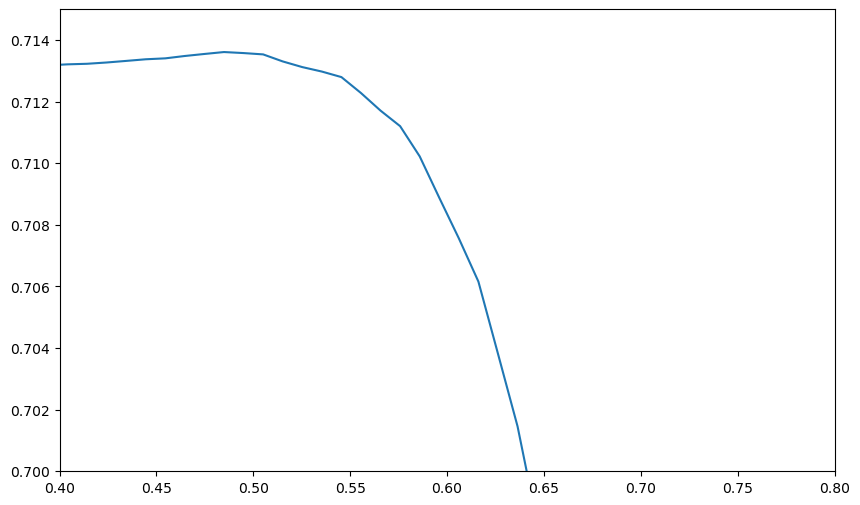

In [30]:
k = 3
# np.random.seed(1337)
# v = np.random.beta(k, 5-k, (N,T))

# v.sort(axis=0)

T = 50_000

def revenue(p_bar):
    payment = []
    np.random.seed(1337)
    v = np.random.beta(k, 5-k, (N,T))
    v.sort(axis=0)
    for i in range(T):
        if p_bar < v[-1,i]:
            payment.append(np.maximum(v[-2,i], p_bar))
        elif p_bar >= v[-1,i]:
            payment.append(0)
    return np.mean(payment)

p_values = np.linspace(0, 1, 100)
revenue_values = [revenue(p_bar) for p_bar in p_values]
print(revenue_values)
print(max(revenue_values))
print(p_values[np.argmax(revenue_values)])

plt.figure(figsize=(10, 6))
plt.plot(p_values, revenue_values, label='Revenue function')
plt.xlim(0.4,0.8)
plt.ylim(0.7, 0.715)